# Artificial Neural Networks

Artificial neural networks are computational systems based on biological neural networks. They consist of a number of interconnected artificial _neurons_ that emulate the way biological neurons communicate to process information in a brain.

More specifically, an artificial neural network may be used to approximate a function
\begin{equation}
	f: x \mapsto y
\end{equation}
where $x$ is an $n$-dimensional input vector and $y$ is an $m$-dimensional output vector. In order to improve the accuracy of the approximation, the function's parameters are adjusted to reduce the error of the approximation $f^*(x)$ for known pairs of $x$ and $y$ (_ground-truth_). During this supervised _training step_ the model learns to represent a function that fits the _training dataset_ best. Subsequently, $f^*(x)$ can be calculated for unseen values of $x$ using the trained model to approximate $y$.

A common approach is to train a model that assigns its input to one of $m$ classes and thus use the network as a classifier. As a result artificial neural networks have been used, among other things, for the following tasks:
* Recognizing objects, handwritten digits and speech
* Pixel-level segmentation and classification of scene images
* Generating sequences

This notebook will give you a theoretical introduction to artificial neural networks and how they are trained, using the simple feed-forward architecture, which is based on [A Primer on Neural Network Models for Natural Language Processing](https://arxiv.org/abs/1510.00726).

## Feed-forward Neural Networks

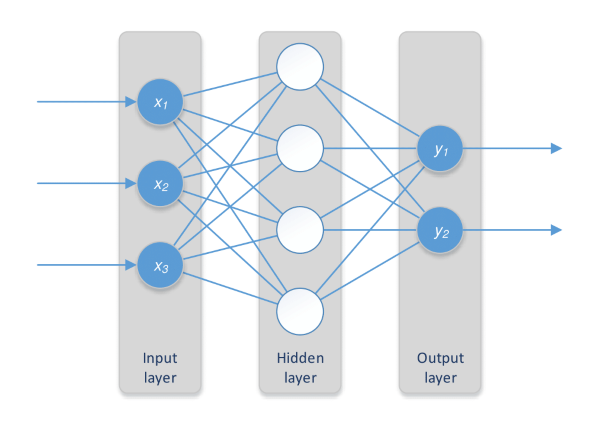

> A feed-forward neural network with an input layer, an output layer and one hidden layer. The neurons receive input values from the preceding layer and pass output values to the subsequent layer.

A simple architecture, an artificial neural network may implement, is called _feed-forward_. These networks are composed of multiple layers of artificial neurons, more specifically:
* An _input layer_
* A number of _hidden layers_
* An _output layer_

While both input and output layer are required, the hidden layers may be omitted. The artificial neurons are fully interconnected between consecutive layers. The figure above depicts an example of a feed-forward neural network. The number of input and output neurons corresponds to the dimensions of the input and output vectors $x$ and $y$ respectively.

Each artificial neuron has a number of incoming and outgoing connections. Every connection of two neurons in the network is associated with a weight. Typically, the output $o$ of a neuron is calculated by summing all of its inputs $x_1, ..., x_n$ multiplied by their respective weights $w_1, ..., w_n$, i.e.
\begin{equation}
	o(x) = g \left( \sum_{i=1}^{n} x_i w_i \right)
\end{equation}
where $g$ is a non-linear _activation function_ of the neuron, which is often the standard logistic function:
\begin{equation}
	g(x) = \sigma(x) = \frac{1}{1+e^{-x}}
\end{equation}
The non-linearity of $g$ enables the model to represent functions that are non-linear as well or classify data that is not linearly separable. Alternatively $tanh(x) = \frac{e^{2x}-1}{e^{2x}+1}$ or $ReLU(x) = \max(0, x)$ are popular choices to be used as activation functions.

By representing each layer using a vector that contains the values of the neurons, the same calculation can be expressed as a matrix multiplication
\begin{equation}
	o = g(xW + b)
\end{equation}
where $o$ is a layer's output vector, $x$ is its input vector, $W$ is a _weight matrix_ and $b$ is a _bias term_. A bias term can be introduced by adding an additional neuron with no incoming connections and a constant value of $1$ to a layer. The activation function is applied element-wise.

Our example network above consists of three layers. Given an input vector $x$, the values of the hidden layer $h$ can be calculated as follows:
\begin{equation}
	h = g_1(x W_1 + b_1)
\end{equation}
$W_1 \in \mathbb{R}^{3 \times 4}$ contains the weights of all connections between the input layer and the hidden layer, $b_1$ is the bias term (not present in the figure) and $g_1$ is the activation function of the hidden layer. Similarly, $h$ can be used to calculate the output vector $y$ as
\begin{equation}
	y = g_2(h W_2 + b_2)
\end{equation}
with $W_2 \in \mathbb{R}^{4 \times 2}$. Combining these equations yields
\begin{equation}
	y = g_2(g_1(x W_1 + b_1) W_2 + b_2)
\end{equation}
$W_i$ and $b_i$ are called _parameters_ of the model.

As a last step, the $m$-dimensional output vector $y$ is often transformed into a discrete probability distribution over $m$ possible values. This can be useful when the model is used for classification purposes and is commonly done by using the _softmax_ function:
\begin{equation}
	softmax(y_i) = \frac{e^{y_i}}{\sum_{j=1}^{m} e^{y_j}}
\end{equation}
This type of feed-forward neural networks is called _multilayer perceptron_.

## Neural Network Training

The adjustment of the parameters (weights and biases) with the objective of minimizing the overall error is called _training_ the model. After a random initialization, a training set composed of pairs of input and output values is used to adjust the parameters to make the model's outputs resemble the expected results more closely and thus decrease the error.

A _loss function_ states the loss of a prediction $\hat{y}$ with respect to the expected value $y$ and is used to determine the error. The _cross-entropy loss_ is a common loss function used in classification problems:
\begin{equation}
	L_{cross-entropy}(\hat{y}, y) = -\sum_{i} y_i \log(\hat{y}_i)
\end{equation}

The optimization of a neural network model works by employing gradient-based methods. The gradient is computed with respect to the error and the parameters of the model are moved in its direction. The following algorithm shows the basic _stochastic gradient descent_ method, where $\eta_k$ is the learning rate:

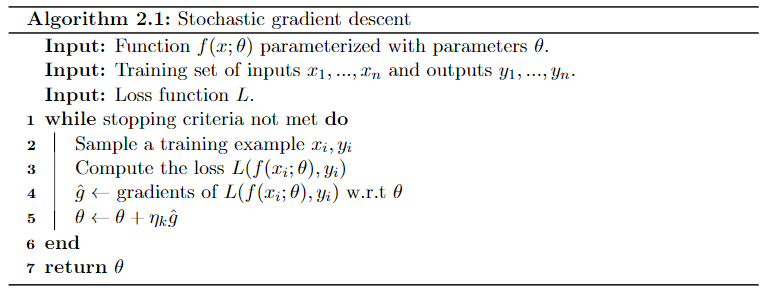

Training is often performed using _minibatches_, i.e. calculating the average gradient of multiple examples, to account for any noise that may be present in the dataset. The following algorithm shows stochastic gradient descent using minibatches:

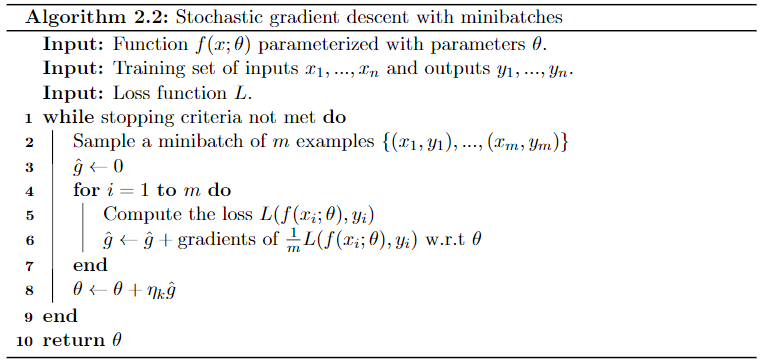

There exist a number of alternatives to stochastic gradient descent optimization, some of which implement an adaptive learning rate. These can, depending on the problem, achieve better results. Some examples are Adam, AdaGrad, AdaDelta and RMSProp. We will not go into detail about these here.

Optimizers use an algorithm called _backpropagation_ to speed up the computation of the gradients which utilizes _computation graphs_ to calculate derivatives. The figure below shows a simple example computation graph. Backpropagation traverses the graph in a breadth-first manner starting with the output node and stores the derivative of every node with respect to the starting node utilizing the chain rule.

Computation graph for the term $n * (n - 1)$ | Computation graph with derivatives
:-: | :-:
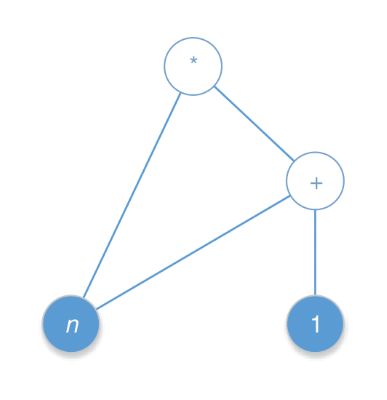 | 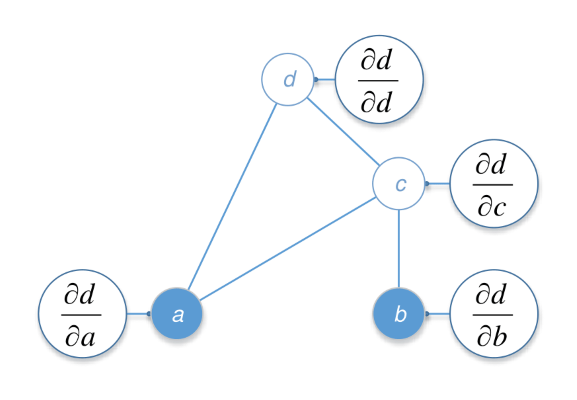

In order to apply backpropagation to a neural network model, it is simply converted to a computation graph. For our previous example, we get the following computation graph, where $s$ is the softmax and $L$ is the loss function:

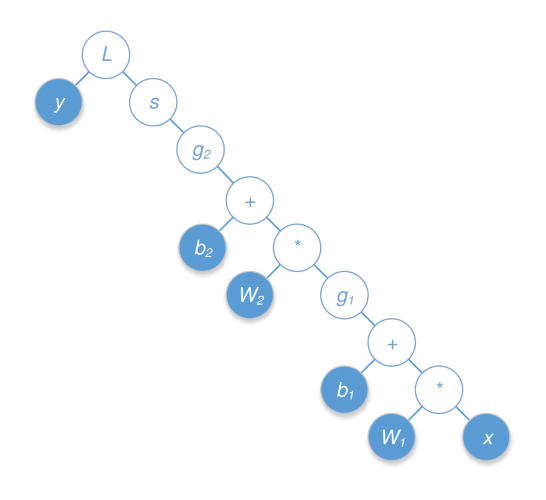

> The loss $L$ of the example feed-forward neural network described expressed as a computation graph. The prediction $\hat{y}$ necessary for the computation of the loss is calculated using the softmax $s$ of the output layer. Backpropagation can be used to compute the gradients which are needed for the optimization.

The process consists of two passes over the graph:
1. The _forward pass_ starts with the input node ($x$) and calculates the value for each node.
2. The _backward pass_ performs backpropagation, starting with the node corresponding to the loss function, to calculate the necessary gradients.

The following algorithms describe the forward and backward pass for a graph consisting of $N$ nodes in a topological order, where $f_i$ denotes the function computed by node $i$ (or a constant for input and variable nodes), $v(i)$ denotes the output of node $i$, $\pi(i)$ denotes the parent nodes of node $i$ and $\pi^{-1}(i) = \{j \mid i \in \pi(j)\}$.

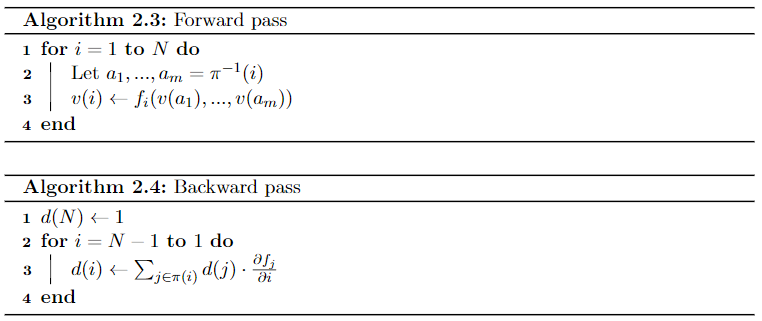

The initial values of the parameters are often randomly sampled from a uniform distribution. Since the loss function is not necessarily convex, gradient descent optimization may not always result in a global minimum. Thus, different initializations may lead to better or worse results. The _xavier initialization_ initializes a weight matrix $W \in \mathbb{R}^{n \times m}$ by uniformly sampling random values in a range that depends on its dimensions, i.e.
\begin{equation}
	W \sim U \left[-\frac{\sqrt{6}}{\sqrt{n + m}}, \frac{\sqrt{6}}{\sqrt{n + m}} \right]
\end{equation}
where $U[a, b]$ is the uniform distribution in $[a, b]$.

# Implementing a Feed-forward Net

With the theory out of the way now, let's implement a very simple feed-forward net. A popular example is learning the XOR function
\begin{equation}
    x_1 \oplus x_2 =
    \begin{cases}
        0 \quad x_1 = x_2\\
        1 \quad x_1 \neq x_2\\
    \end{cases}
\end{equation}
This function defines the dimensions of the input and output layer of the net, as it takes two inputs ($x_1$ and $x_2$) and outputs a single number $y$. Thus, our net will have two input neurons and one output neuron.

In this final section we will implement the XOR example using TensorFlow.

In [1]:
import numpy as np
import tensorflow as tf

We first create pairs $(x, y)$ of inputs and corresponding outputs. Since we only have four possible inputs in our case, we can simply enumerate them manually:

In [2]:
X = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.asarray([[0], [1], [1], [0]])

print('shape of X: {}, shape of Y: {}'.format(X.shape, Y.shape))

print('  x\t y')
print('-----------')
for x, y in zip(X, Y):
    print('{}\t{}'.format(x, y))

shape of X: (4, 2), shape of Y: (4, 1)
  x	 y
-----------
[0 0]	[0]
[0 1]	[1]
[1 0]	[1]
[1 1]	[0]


TensorFlow supports _lazy evaluation_, which means we get to fully define the computation graph before we do the actual computations. Note that there are alternatives (sequential API, eager execution etc.) which might be more viable depending on the application. Refer to the TensorFlow tutorial for more details. In this example we will stick to building the computation graph, as it is a very shallow network.

First, we add some _placeholders_, which allow us to input values into the net. In our case, we need placeholders for our input $X$ and expected output $Y$. The shapes are identical to the shapes of the actual arrays we defined earlier.

In [3]:
plh_X = tf.placeholder(tf.float32, shape=(4, 2))
plh_Y = tf.placeholder(tf.float32, shape=(4, 1))

Next, we add our weight matrices $W_1$ and $W_2$. Since these matrices are trainable parameters and not inputs or outputs, we add them as _variables_. The shapes of the matrices are determined by the size of the layers. For example, $W_1$ transforms $2$-dimensional input vectors into $3$-dimensional hidden representations, thus $W_1 \in \mathbb{R}^{2 \times 3}$. We initialize the matrices randomly in $[-1; 1]$.

In [4]:
W1 = tf.Variable(tf.random_uniform([2, 3], -1, 1))
W2 = tf.Variable(tf.random_uniform([3, 1], -1, 1))

Instructions for updating:
Colocations handled automatically by placer.


We can now define the forward pass:

In [5]:
h = tf.sigmoid(tf.matmul(plh_X, W1))
y_out = tf.sigmoid(tf.matmul(h, W2))

Finally, we use Tensorflow's implementations of the $L_2$ loss and gradient descent (with a learning rate of $1$) for the optimization.

In [6]:
loss = tf.reduce_mean(tf.nn.l2_loss(plh_Y - y_out))
train_step = tf.train.GradientDescentOptimizer(1).minimize(loss)

Now with the computation graph defined, we need to create a TensorFlow session to train the net. Using the session, we can execute arbtrary nodes in our graph and include values for the placeholders we defined. For example, we can run the train step, which minimizes the loss, and print out the network outputs afterwards:

In [7]:
EPOCHS = 10000
with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    for _ in range(EPOCHS):
        session.run(train_step, feed_dict={plh_X: X, plh_Y: Y})

    print(session.run(y_out, feed_dict={plh_X: X}))

[[0.03313332]
 [0.9799488 ]
 [0.97990257]
 [0.00612415]]


We get a good approximation of the XOR function.